In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras. optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os



In [11]:
train= ImageDataGenerator(rescale= 1/255)
Validation=ImageDataGenerator(1/255)


In [12]:
train_dataset = train.flow_from_directory(r'C:\Users\0m\Desktop\P-91 Project\Dataset\Train',
                                         target_size = (224, 224),
                                         batch_size = 40,
                                         class_mode = 'binary')

Found 2456 images belonging to 2 classes.


In [13]:
validation_dataset = train.flow_from_directory(r'C:\Users\0m\Desktop\P-91 Project\Dataset\Test',
                                                 target_size = (224, 224),
                                                 batch_size = 5,
                                                 class_mode = 'binary')

Found 68 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'Defective': 0, 'Non Defective': 1}

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(20,(3,3), activation = 'relu', input_shape=(224,224,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                  
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   
                                  ])


In [16]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
model_fit= model.fit(train_dataset,
                     steps_per_epoch=2,
      
                     epochs = 130,
                      validation_data=validation_dataset
                     )

Epoch 1/130
2/2 [==============================] - 67s 42s/step - loss: 3.7271 - accuracy: 0.6000 - val_loss: 1.0878 - val_accuracy: 0.5294
Epoch 2/130
2/2 [==============================] - 61s 48s/step - loss: 1.2357 - accuracy: 0.5375 - val_loss: 1.4276 - val_accuracy: 0.4706
Epoch 3/130
2/2 [==============================] - 17s 9s/step - loss: 1.1399 - accuracy: 0.4250 - val_loss: 0.7443 - val_accuracy: 0.4706
Epoch 4/130
2/2 [==============================] - 10s 6s/step - loss: 0.7200 - accuracy: 0.4625 - val_loss: 0.7722 - val_accuracy: 0.5294
Epoch 5/130
2/2 [==============================] - 12s 6s/step - loss: 0.7962 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5294
Epoch 6/130
2/2 [==============================] - 11s 6s/step - loss: 0.6659 - accuracy: 0.6500 - val_loss: 0.6835 - val_accuracy: 0.5294
Epoch 7/130
2/2 [==============================] - 9s 6s/step - loss: 0.7069 - accuracy: 0.4643 - val_loss: 0.6795 - val_accuracy: 0.5294
Epoch 8/130
2/2 [=========

In [26]:
  
model.save('model.h5')

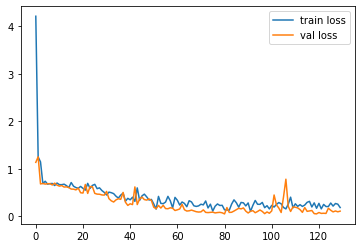

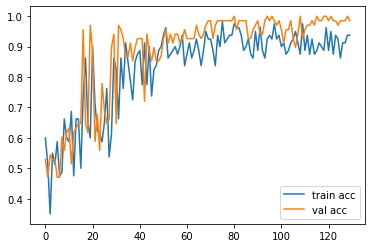

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

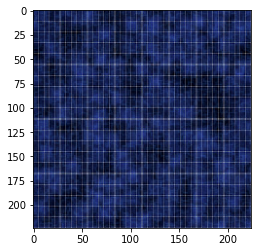

In [10]:
img=image.load_img(r'C:\Users\0m\Desktop\P-91 Project\Dataset\Test\Non Defective\09.jpg',target_size=(224,224))
plt.imshow(img)
plt.show()


In [11]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images=np.vstack([x])

In [12]:
val=model.predict(x)


In [13]:
val

array([[1.]], dtype=float32)

In [14]:
if val== 0:
    print("Panel is defective")
else:
    print("Panel is not defetive")

Panel is not defetive


In [15]:
y_pred = model.predict(validation_dataset)

In [16]:
y_pred

array([[1.0182586e-04],
       [1.1225492e-02],
       [1.7778575e-03],
       [5.8868021e-02],
       [9.9999124e-01],
       [7.2252619e-01],
       [3.3745766e-03],
       [8.0757827e-01],
       [1.8365383e-03],
       [9.8215771e-01],
       [4.6888053e-02],
       [8.3011425e-01],
       [8.2322782e-01],
       [1.2442470e-04],
       [6.2556505e-01],
       [8.3711743e-04],
       [5.3115487e-02],
       [7.5523263e-01],
       [1.0000000e+00],
       [7.6037776e-01],
       [7.8386265e-01],
       [2.0425320e-03],
       [1.8684268e-03],
       [1.7055273e-03],
       [8.2147872e-01],
       [2.5514360e-05],
       [7.4624890e-01],
       [9.8358405e-01],
       [8.1681252e-01],
       [1.4878693e-01],
       [7.9405069e-01],
       [7.6048326e-01],
       [5.9842712e-01],
       [5.1555127e-02],
       [6.9964167e-06],
       [1.0333657e-03],
       [9.9999636e-01],
       [8.1994009e-01],
       [3.8015842e-03],
       [1.0000000e+00],
       [6.9964171e-06],
       [8.132415

In [214]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [215]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model

In [17]:
model.save('model.h5')

In [29]:
model_new=load_model('model.h5')

In [30]:
model_new.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 20)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      5792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      